# Data Preparation

## Import Libraries

In [15]:
import numpy as np
import pandas as pd

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [16]:
loan_data_backup = pd.read_csv(r"C:\Users\imhj1\Codes\Loan data 2007-2014\loan_data_2007_2014.csv")

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\2206831301.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv(r"C:\Users\imhj1\Codes\Loan data 2007-2014\loan_data_2007_2014.csv")


In [17]:
loan_data = loan_data_backup.copy()

## Explore Data

In [18]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [19]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [20]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [21]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [23]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [24]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Converting non desired Objects into numeric values

In this dataframe, values of term and employment length is given in strings, which needs to be converted to the numeric value

In [25]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan_data['emp_length'].fillna(str(0),inplace = True)

In [26]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year','')

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\3391555772.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [27]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [28]:
loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [29]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [30]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [31]:
loan_data['term_int'] = loan_data['term'].str.replace('months','')

In [32]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [33]:
type(loan_data['term_int'][0])

numpy.int64

In [34]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

### Converting timestamps into time difference

In [35]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [36]:
loan_data['earliest_cr_line_time'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [37]:
 #considering date of modelling to be 31-12-2017
loan_data['mnths_earliest_cr_line'] = (pd.to_datetime('12-31-2017') - loan_data['earliest_cr_line_time'])/np.timedelta64(1,'M')

In [38]:
loan_data['mnths_earliest_cr_line'].describe()

count    466256.000000
mean        240.481376
std          93.976747
min        -611.035134
25%         183.987351
50%         226.041602
75%         286.034621
max         587.971006
Name: mnths_earliest_cr_line, dtype: float64

In [39]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_time','mnths_earliest_cr_line']][loan_data['mnths_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_time,mnths_earliest_cr_line
1580,Sep-62,2062-09-01,-536.027434
1770,Sep-68,2068-09-01,-608.045340
2799,Sep-64,2064-09-01,-560.044354
3282,Sep-67,2067-09-01,-596.020452
3359,Feb-65,2065-02-01,-565.071151
...,...,...,...
464003,Jan-68,2068-01-01,-600.028748
464260,Jul-66,2066-07-01,-581.991417
465100,Oct-67,2067-10-01,-597.006099
465500,Sep-67,2067-09-01,-596.020452


Here years like 1962 are assumed as 2062, therefore adding 1200 months to the difference for adjusting to the 100 years back

In [40]:
loan_data['mnths_earliest_cr_line'][loan_data['mnths_earliest_cr_line']<0] = loan_data['mnths_earliest_cr_line'][loan_data['mnths_earliest_cr_line']<0] + 1200

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\586271410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mnths_earliest_cr_line'][loan_data['mnths_earliest_cr_line']<0] = loan_data['mnths_earliest_cr_line'][loan_data['mnths_earliest_cr_line']<0] + 1200


In [41]:
loan_data['mnths_earliest_cr_line'].describe()

count    466256.000000
mean        243.490024
std          86.930428
min          73.989199
25%         185.005852
50%         226.961539
75%         286.034621
max         887.977166
Name: mnths_earliest_cr_line, dtype: float64

In [42]:
loan_data['last_pymnt_d']

0         Jan-15
1         Apr-13
2         Jun-14
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Dec-14
466282    Jan-16
466283    Dec-14
466284    Jan-16
Name: last_pymnt_d, Length: 466285, dtype: object

In [43]:
loan_data['last_payment_date'] = pd.to_datetime(loan_data['last_pymnt_d'],format='%b-%y')

In [44]:
loan_data['mnths_last_payment'] = (pd.to_datetime('12-31-2017') - loan_data['last_payment_date'])/np.timedelta64(1,'M')

In [45]:
loan_data['mnths_last_payment'].describe()

count    465909.000000
mean         32.289374
std          12.811820
min          23.984065
25%          23.984065
50%          25.002567
75%          35.976098
max         121.004538
Name: mnths_last_payment, dtype: float64

In [46]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [47]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y')

In [48]:
loan_data['mnths_since_issue_d'] = (pd.to_datetime('12-31-2017') - loan_data['issue_date'])/np.timedelta64(1,'M')

In [49]:
loan_data['mnths_since_issue_d'].describe()

count    466285.000000
mean         52.250822
std          14.338664
min          36.994599
25%          42.021397
50%          47.968131
75%          58.021725
max         127.016982
Name: mnths_since_issue_d, dtype: float64

## Preprocessing discrete variables to dummies

In [50]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [51]:
loan_data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [52]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                     pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                     pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                     pd.get_dummies(loan_data['pymnt_plan'],prefix='pymnt_plan',prefix_sep=':'),
                     pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),                     
                     pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                     pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]

In [53]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [54]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [55]:
loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

In [56]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

# Treating missing Values

In [57]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_time,mnths_earliest_cr_line,last_payment_date,mnths_last_payment,issue_date,mnths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),pymnt_plan:n,pymnt_plan:y,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [58]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [59]:
pd.options.display.max_rows = 100

In [60]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [61]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [62]:
display(type(loan_data['pub_rec'][0]))
loan_data['pub_rec'].unique()

numpy.float64

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  9.,  8.,  7., 11., 49.,
       10., 54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34.,
       17.])

In [63]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [64]:
loan_data['mnths_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [65]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

# Data Preperation for PD estimation

### Dependent Variable defnition: Good/Bad defnition

In [66]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [67]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [68]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [69]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Late (31-120 days)',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off']),0,1)

In [70]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [71]:
loan_data.to_csv('loan_data_2007_2014_preprocessed.csv')

### Splitting Data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
loan_data_input_train, loan_data_input_test, loan_data_output_train, loan_data_output_test = train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],train_size=0.8,random_state = 42)

In [74]:
display(loan_data_input_train.shape)
display(loan_data_output_train.shape)

(373028, 211)

(373028,)

In [75]:
display(loan_data_input_test.shape)
display(loan_data_output_test.shape)

(93257, 211)

(93257,)

### Data Preparation: Step by Step

The whole data preprocessing process is first conducted for the training data set and then for test data set

In [209]:
# df_input = loan_data_input_train.copy()
# df_output = loan_data_output_train.copy()
df_input = loan_data_input_test.copy()
df_output = loan_data_output_test.copy()

In [210]:
df_input['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [211]:
df1 = pd.concat([df_input['grade'],df_output],axis=1)

In [212]:
df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [213]:
df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962338
1,B,0.923085
2,C,0.882905
3,D,0.844314
4,E,0.805178
5,F,0.775472
6,G,0.697605


In [214]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].mean()],axis=1)

In [215]:
df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962338
1,B,27199,B,0.923085
2,C,25048,C,0.882905
3,D,15390,D,0.844314
4,E,7145,E,0.805178
5,F,2699,F,0.775472
6,G,668,G,0.697605


In [216]:
df1 = df1.iloc[:,[0,1,3]]

In [217]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']
df1.head()

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178


In [218]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [219]:
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good'])*df1['n_obs']

In [220]:
df1['perc_good'] = df1['n_good']/df1['n_good'].sum()
df1['perc_bad'] = df1['n_bad']/df1['n_bad'].sum()

In [221]:
df1['WoE'] = np.log(df1['perc_good']/df1['perc_bad'])

In [222]:
df1['Inf_Value'] = (df1['perc_good'] - df1['perc_bad'])*df1['WoE']
df1['Inf_Value'] = df1['Inf_Value'].sum()

In [223]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.300551
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.300551
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.300551
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.300551
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.300551
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,0.300551


### Preprocessing Discrete Variables: Automating Calculaions

In [224]:
def Woe_discrete(df, discrete_variable_name, output_df):
    df = pd.concat([df[discrete_variable_name],output_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index= False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index= False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])*df['n_obs']
    df['perc_good'] = df['n_good']/df['n_good'].sum()
    df['perc_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['perc_good']/df['perc_bad'])
    df = df.sort_values('WoE')
    df.reset_index(drop=True,inplace = True)
    df['Inf_Value'] = (df['perc_good'] - df['perc_bad'])*df['WoE']
    df['Inf_Value'] = df['Inf_Value'].sum()
    
    return df

In [225]:
df_temp = Woe_discrete(df_input,'grade',df_output)

In [226]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.300551


### Preprocessing Discrete Variables: Visualizing Results

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [228]:
def plot_woe(df_woe, rotation_of_axis=0):
    x = np.array(df_woe.iloc[: , 0].apply(str))
    y = df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o', linestyle ='--',color='k')
    plt.title(f'Weight of Evidence of {df_woe.columns.values[0]}')
    plt.xlabel(df_woe.columns.values[0])
    plt.ylabel('WoE')
    plt.xticks(rotation = rotation_of_axis)
    plt.show()

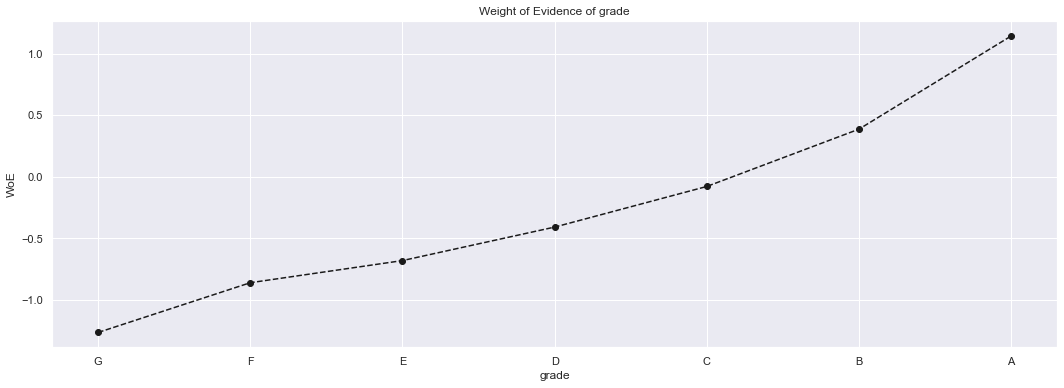

In [229]:
plot_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [230]:
df_temp = Woe_discrete(df_input,'home_ownership',df_output)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.022938


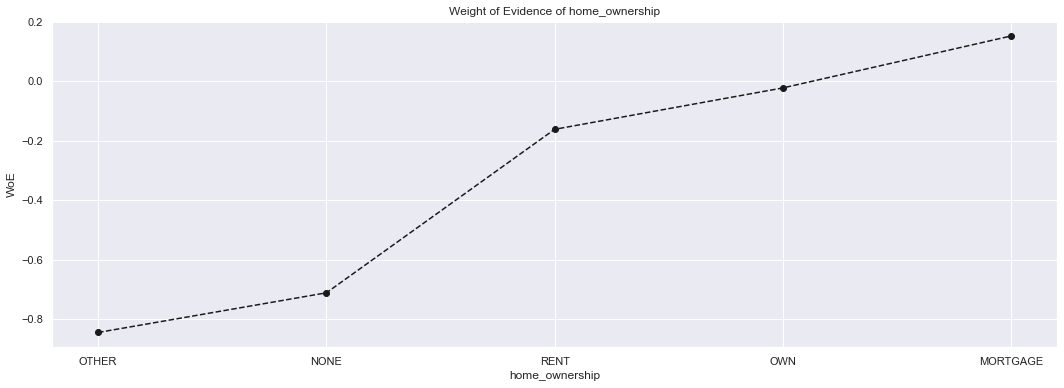

In [231]:
plot_woe(df_temp)

In [232]:
df_input['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_input['home_ownership:ANY'],df_input['home_ownership:NONE'],
                                                   df_input['home_ownership:OTHER'],df_input['home_ownership:RENT']])
#OTHER ANY NONE and RENT are combined due to its low amount of number

In [233]:
df_temp = Woe_discrete(df_input,'verification_status',df_output)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.022684


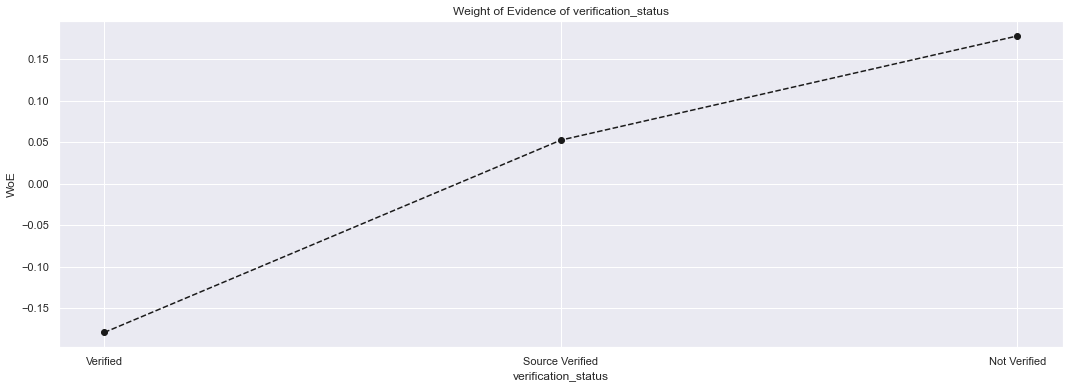

In [234]:
plot_woe(df_temp)

In [235]:
df_temp = Woe_discrete(df_input,'pymnt_plan',df_output)
df_temp
#this feature can be ignored due to its very low information value

,pymnt_plan,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,y,2,0.50000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.000181
1,n,93255,0.89074,0.999979,83066.0,10189.0,0.999988,0.999902,0.000086,0.000181


In [236]:
df_temp = Woe_discrete(df_input,'verification_status',df_output)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.022684


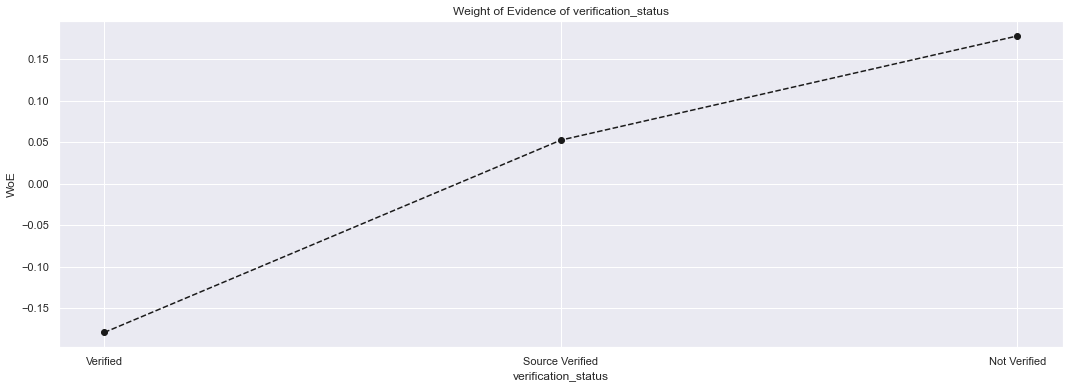

In [237]:
plot_woe(df_temp)

In [238]:
df_temp = Woe_discrete(df_input,'addr_state',df_output)
df_temp

D:\Users\imhj1\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,inf


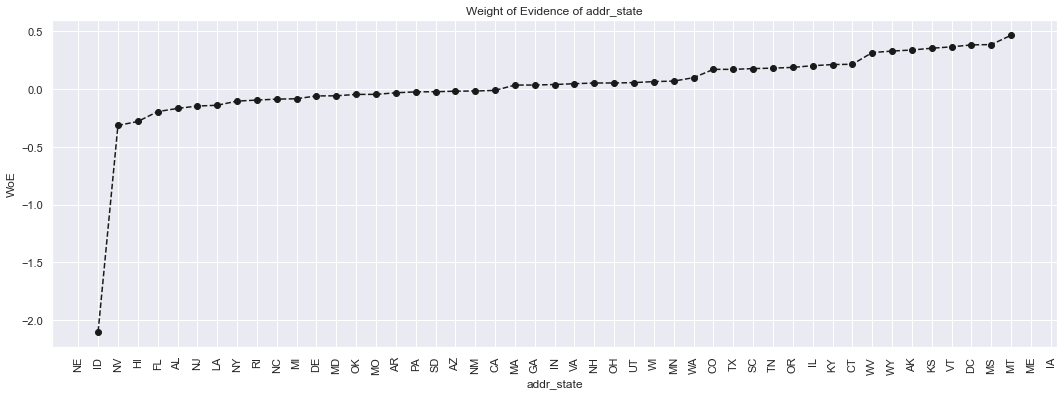

In [239]:
plot_woe(df_temp,90)

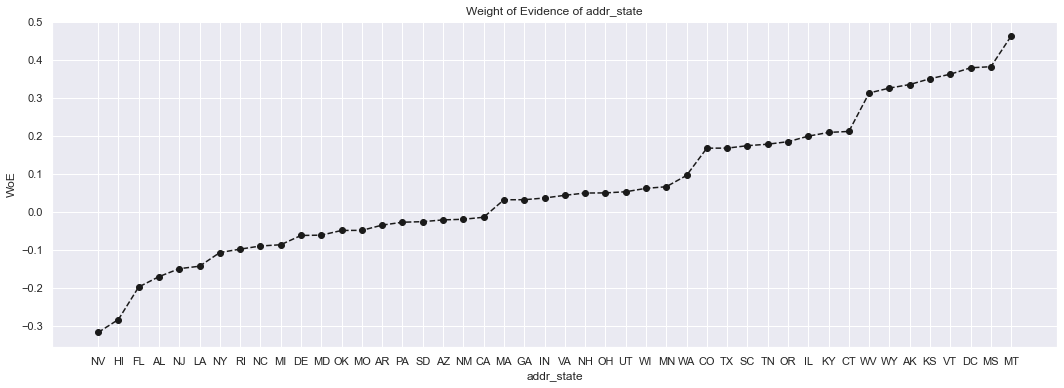

In [240]:
plot_woe(df_temp.iloc[2:-2,:])

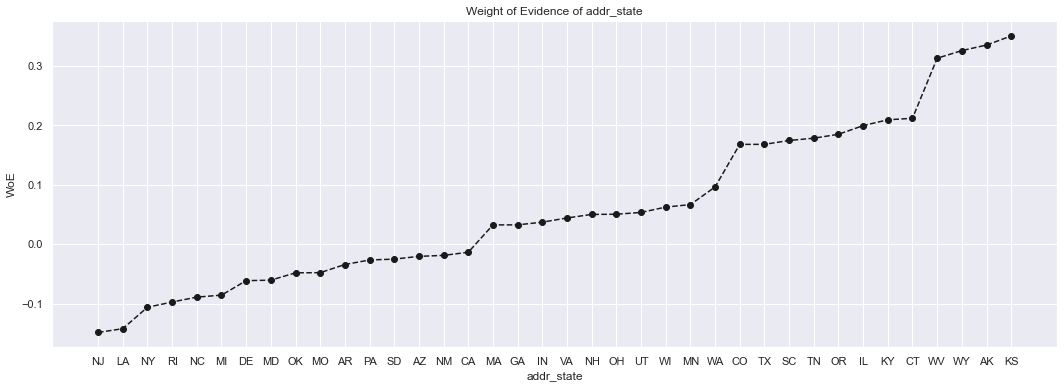

In [241]:
plot_woe(df_temp.iloc[6:-6,:])

In [242]:
# states are combined based on their Weight of Evidence 
df_input['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([ df_input['addr_state:NE'], df_input['addr_state:IA'], 
                                                   df_input['addr_state:NV'], df_input['addr_state:FL'], 
                                                   df_input['addr_state:HI'], df_input['addr_state:AL']])

df_input['addr_state:NM_VA'] = sum([df_input['addr_state:NM'], df_input['addr_state:VA']])

df_input['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_input['addr_state:OK'], df_input['addr_state:TN'],
                                              df_input['addr_state:MO'], df_input['addr_state:LA'],
                                              df_input['addr_state:MD'], df_input['addr_state:NC']])

df_input['addr_state:UT_KY_AZ_NJ'] = sum([df_input['addr_state:UT'], df_input['addr_state:KY'],
                                              df_input['addr_state:AZ'], df_input['addr_state:NJ']])

df_input['addr_state:AR_MI_PA_OH_MN'] = sum([df_input['addr_state:AR'], df_input['addr_state:MI'],
                                              df_input['addr_state:PA'], df_input['addr_state:OH'],
                                              df_input['addr_state:MN']])

df_input['addr_state:RI_MA_DE_SD_IN'] = sum([df_input['addr_state:RI'], df_input['addr_state:MA'],
                                              df_input['addr_state:DE'], df_input['addr_state:SD'],
                                              df_input['addr_state:IN']])

df_input['addr_state:GA_WA_OR'] = sum([df_input['addr_state:GA'], df_input['addr_state:WA'],
                                              df_input['addr_state:OR']])

df_input['addr_state:WI_MT'] = sum([df_input['addr_state:WI'], df_input['addr_state:MT']])

df_input['addr_state:IL_CT'] = sum([df_input['addr_state:IL'], df_input['addr_state:CT']])

df_input['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_input['addr_state:KS'], df_input['addr_state:SC'],
                                              df_input['addr_state:CO'], df_input['addr_state:VT'],
                                              df_input['addr_state:AK'], df_input['addr_state:MS']])

df_input['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_input['addr_state:WV'], df_input['addr_state:NH'],
                                              df_input['addr_state:WY'], df_input['addr_state:DC'],
                                              df_input['addr_state:ME'], df_input['addr_state:ID']])


In [243]:
df_temp = Woe_discrete(df_input,'purpose',df_output)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.045124


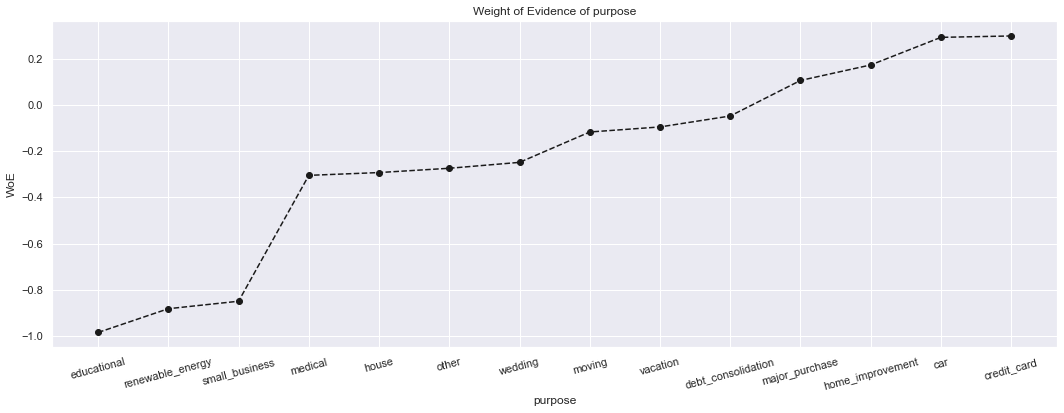

In [244]:
plot_woe(df_temp,15)

In [245]:
df_input['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_input['purpose:educational'], df_input['purpose:small_business'],
                                                                 df_input['purpose:wedding'], df_input['purpose:renewable_energy'],
                                                                 df_input['purpose:moving'], df_input['purpose:house']])
df_input['purpose:oth__med__vacation'] = sum([df_input['purpose:other'], df_input['purpose:medical'],
                                             df_input['purpose:vacation']])
df_input['purpose:major_purch__car__home_impr'] = sum([df_input['purpose:major_purchase'], df_input['purpose:car'],
                                                        df_input['purpose:home_improvement']])

In [246]:
df_temp =Woe_discrete(df_input,'initial_list_status',df_output)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.71423,-0.108794,0.024888
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.28577,0.229238,0.024888


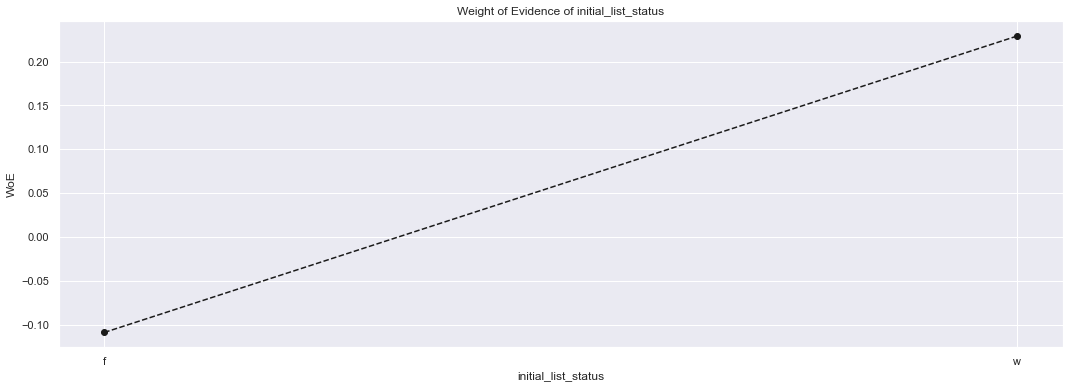

In [247]:
plot_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [248]:
def Woe_continous(df, continous_variable_name, output_df):
    df = pd.concat([df[continous_variable_name],output_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index= False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index= False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])*df['n_obs']
    df['perc_good'] = df['n_good']/df['n_good'].sum()
    df['perc_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['perc_good']/df['perc_bad'])
    df['Inf_Value'] = (df['perc_good'] - df['perc_bad'])*df['WoE']
    df['Inf_Value'] = df['Inf_Value'].sum()
    
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [249]:
df_input['term_int'].unique()

array([60, 36], dtype=int64)

In [250]:
df_temp = Woe_continous(df_input,'term_int',df_output)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.036603


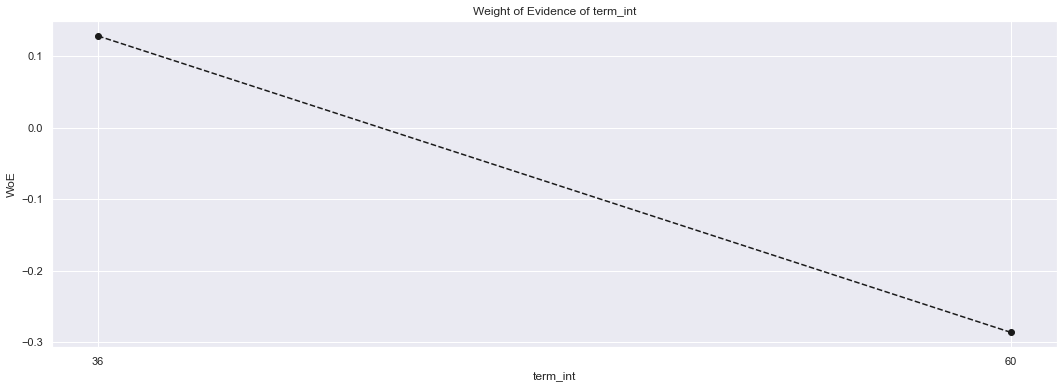

In [251]:
plot_woe(df_temp)

In [252]:
df_input['term:36'] = np.where(df_input['term_int']==36,1,0)
df_input['term:60'] = np.where(df_input['term_int']==60,1,0)

In [253]:
df_input['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [254]:
df_temp = Woe_continous(df_input,'emp_length_int',df_output)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,0.007766
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.007766
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.007766
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.007766
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.007766
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.007766
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007766
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.007766
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.007766
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.007766


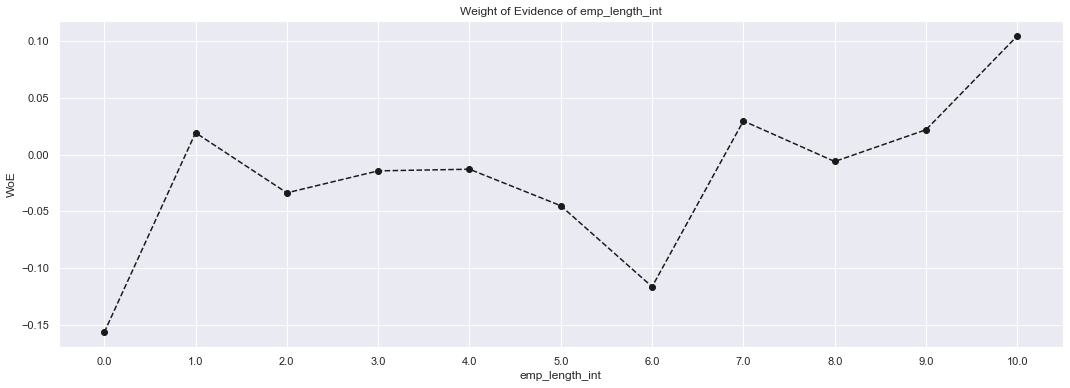

In [255]:
plot_woe(df_temp)

In [256]:
df_input['emp_length:0'] = np.where(df_input['emp_length_int']==0,1,0)
df_input['emp_length:1'] = np.where(df_input['emp_length_int']==1,1,0)
df_input['emp_length:2-4'] = np.where(df_input['emp_length_int'].isin(range(2,5)),1,0)
df_input['emp_length:5-6'] = np.where(df_input['emp_length_int'].isin(range(5,7)),1,0)
df_input['emp_length:7-9'] = np.where(df_input['emp_length_int'].isin(range(7,10)),1,0)
df_input['emp_length:10'] = np.where(df_input['emp_length_int'].isin([10]),1,0)

In [257]:
df_input['mnths_since_issue_d'].unique()

array([ 42.02139674,  38.99874741,  66.99110865,  37.980246  ,
        58.94166205,  50.9907801 ,  86.99973305,  51.97642662,
        48.98663217,  59.96016345,  73.00355243,  78.0303497 ,
        47.96813076,  46.94962936,  57.00322389,  56.01757736,
       119.98603667,  63.96845931, 103.0000616 ,  39.98439393,
        54.01342943,  41.00289534,  52.99492803,  44.02554467,
        49.97227869,  58.02172529,  46.0296926 ,  36.99459948,
        54.99907596,  75.00770036,  45.01119119,  73.98919896,
       104.01856301,  70.96654962,  95.96911641,  90.02238239,
        68.99525658,  82.95858231,  71.98505103,  77.01184829,
       105.00420953,  66.00546212,  81.02014415,  92.02653032,
        75.99334689,  68.00961005,  43.00704327,  61.96431138,
        64.98696072,  60.97866486,  85.98123165,  89.00388098,
       110.98379844,  96.98761782,  79.01599622,  83.97708372,
        70.01375798,  91.00802891,  62.98281279, 108.97965051,
        80.03449763,  93.01217684, 118.96753527,  99.97

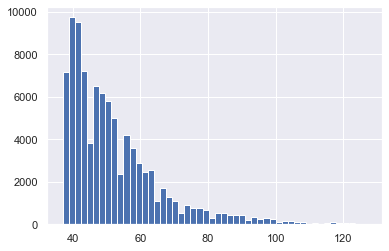

In [258]:
plt.hist(df_input['mnths_since_issue_d'],bins=50)
plt.show()

In [259]:
df_input['mnths_since_issue_d_factor'] = pd.cut(df_input['mnths_since_issue_d'],50)

In [260]:
df_input['mnths_since_issue_d_factor'].unique()

[(40.595, 42.396], (38.795, 40.595], (65.802, 67.602], (36.905, 38.795], (58.6, 60.4], ..., (123.416, 125.217], (125.217, 127.017], (109.013, 110.813], (112.613, 114.414], (121.616, 123.416]]
Length: 50
Categories (50, interval[float64, right]): [(36.905, 38.795] < (38.795, 40.595] < (40.595, 42.396] < (42.396, 44.196] ... (119.815, 121.616] < (121.616, 123.416] < (123.416, 125.217] < (125.217, 127.017]]

In [261]:
df_temp = Woe_continous(df_input,'mnths_since_issue_d_factor',df_output)
df_temp

,mnths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(36.905, 38.795]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,0.126674
1,"(38.795, 40.595]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.126674
2,"(40.595, 42.396]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.126674
3,"(42.396, 44.196]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.126674
4,"(44.196, 45.997]",3821,0.908139,0.040973,3470.0,351.0,0.041774,0.034446,0.192883,0.126674
5,"(45.997, 47.797]",6500,0.896154,0.069700,5825.0,675.0,0.070124,0.066241,0.056961,0.126674
6,"(47.797, 49.598]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.126674
7,"(49.598, 51.398]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.126674
8,"(51.398, 53.199]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.126674
9,"(53.199, 54.999]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.126674


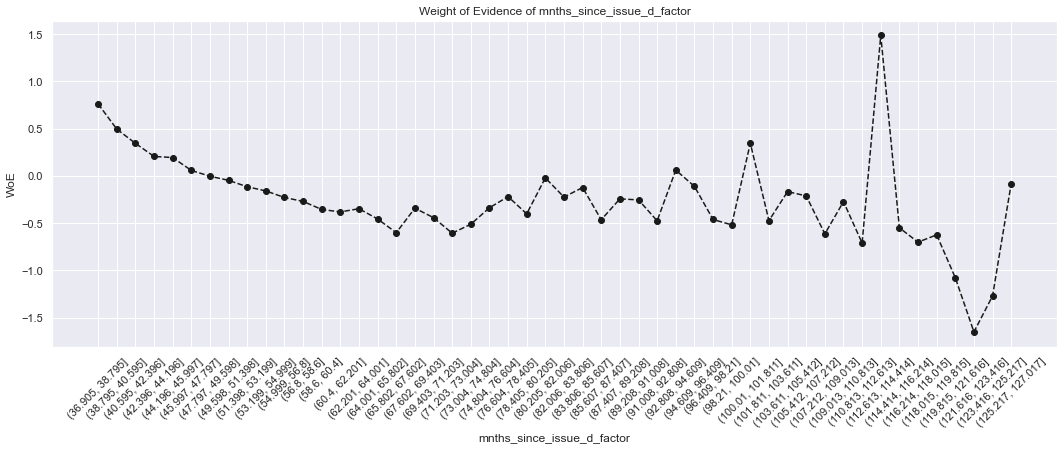

In [262]:
plot_woe(df_temp,45)

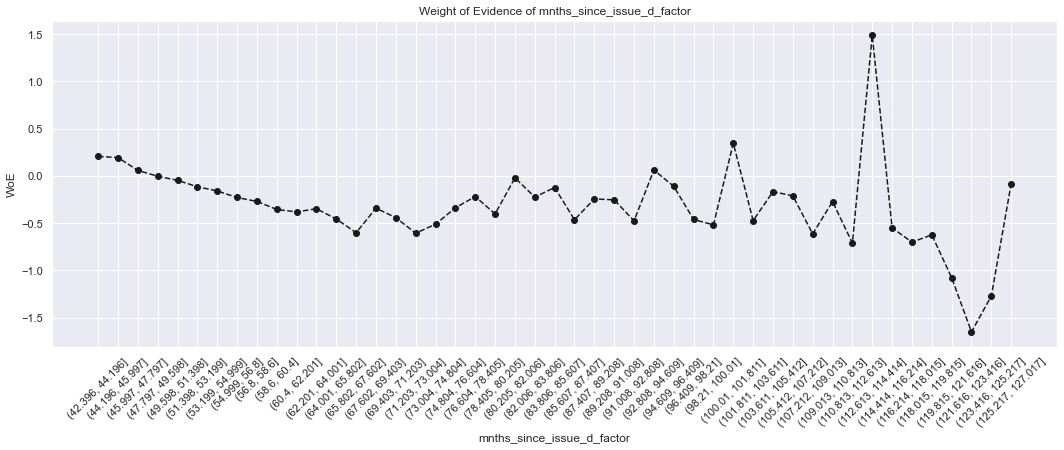

In [263]:
plot_woe(df_temp.iloc[3:,:],45)

In [264]:
df_input['mnths_since_issue_d:<38'] = np.where(df_input['mnths_since_issue_d'].isin(range(38)), 1, 0)
df_input['mnths_since_issue_d:38-39'] = np.where(df_input['mnths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_input['mnths_since_issue_d:40-41'] = np.where(df_input['mnths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_input['mnths_since_issue_d:42-48'] = np.where(df_input['mnths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_input['mnths_since_issue_d:49-52'] = np.where(df_input['mnths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_input['mnths_since_issue_d:53-64'] = np.where(df_input['mnths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_input['mnths_since_issue_d:65-84'] = np.where(df_input['mnths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_input['mnths_since_issue_d:>84'] = np.where(df_input['mnths_since_issue_d'].isin(range(85, int(df_input['mnths_since_issue_d'].max()))), 1, 0)

In [265]:
df_input['int_rate'].describe()

count    93257.000000
mean        13.836190
std          4.371315
min          5.420000
25%         10.990000
50%         13.660000
75%         16.490000
max         26.060000
Name: int_rate, dtype: float64

In [266]:
df_input['int_rate_factor'] = pd.cut(df_input['int_rate'],50)

In [267]:
df_input['int_rate_factor'].unique()

[(14.914, 15.327], (20.694, 21.106], (14.502, 14.914], (14.089, 14.502], (8.722, 9.135], ..., (7.897, 8.31], (24.822, 25.234], (5.399, 5.833], (25.647, 26.06], (17.804, 18.217]]
Length: 50
Categories (50, interval[float64, right]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [268]:
df_temp = Woe_continous(df_input,'int_rate_factor',df_output)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.371465


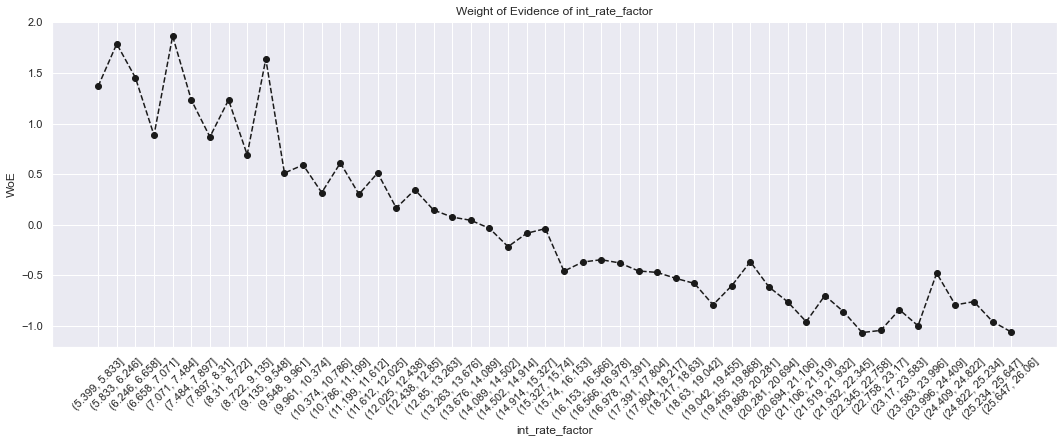

In [269]:
plot_woe(df_temp,45)

In [270]:
df_input['int_rate:<9.548'] = np.where((df_input['int_rate'] <= 9.548), 1, 0)
df_input['int_rate:9.548-12.025'] = np.where((df_input['int_rate'] > 9.548) & (df_input['int_rate'] <= 12.025), 1, 0)
df_input['int_rate:12.025-15.74'] = np.where((df_input['int_rate'] > 12.025) & (df_input['int_rate'] <= 15.74), 1, 0)
df_input['int_rate:15.74-20.281'] = np.where((df_input['int_rate'] > 15.74) & (df_input['int_rate'] <= 20.281), 1, 0)
df_input['int_rate:>20.281'] = np.where((df_input['int_rate'] > 20.281), 1, 0)

In [271]:
df_input['funded_amt_factor'] = pd.cut(df_input['funded_amnt'],50)
df_input['funded_amt_factor'].unique()

[(32240.0, 32930.0], (10850.0, 11540.0], (29480.0, 30170.0], (14300.0, 14990.0], (14990.0, 15680.0], ..., (465.5, 1190.0], (31550.0, 32240.0], (26030.0, 26720.0], (28100.0, 28790.0], (30170.0, 30860.0]]
Length: 50
Categories (50, interval[float64, right]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [272]:
df_temp = Woe_continous(df_input,'funded_amt_factor',df_output)
df_temp

,funded_amt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.018663


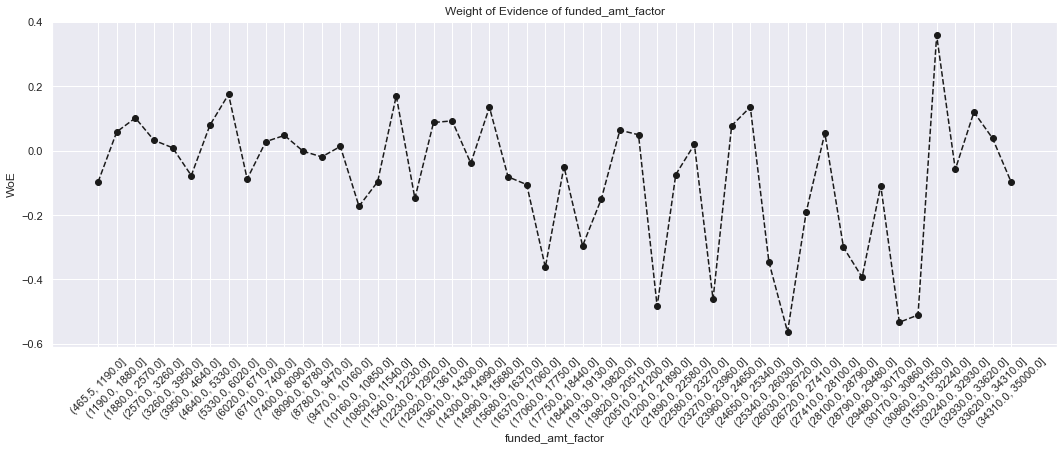

In [273]:
plot_woe(df_temp,45)
#we can ignore this feature due to its low information value

In [274]:
df_input['mnths_earliest_cr_line_factor'] = pd.cut(df_input['mnths_earliest_cr_line'],50)
df_temp = Woe_continous(df_input,'mnths_earliest_cr_line_factor',df_output)
df_temp

,mnths_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.805, 16.1]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,inf
1,"(16.1, 32.199]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
2,"(32.199, 48.299]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
3,"(48.299, 64.399]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
4,"(64.399, 80.499]",97,0.907216,0.001040,88.0,9.0,0.001059,0.000883,0.181872,inf
5,"(80.499, 96.598]",684,0.912281,0.007335,624.0,60.0,0.007512,0.005888,0.243565,inf
6,"(96.598, 112.698]",1133,0.857899,0.012149,972.0,161.0,0.011701,0.015800,-0.300289,inf
7,"(112.698, 128.798]",2660,0.867293,0.028523,2307.0,353.0,0.027773,0.034642,-0.221005,inf
8,"(128.798, 144.897]",3954,0.864947,0.042399,3420.0,534.0,0.041172,0.052404,-0.241241,inf
9,"(144.897, 160.997]",5349,0.886147,0.057358,4740.0,609.0,0.057062,0.059764,-0.046267,inf


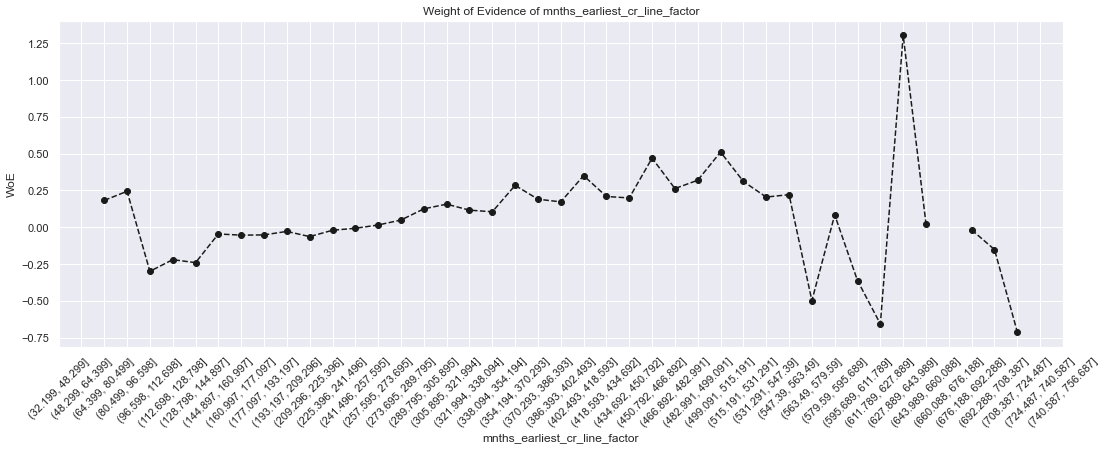

In [275]:
plot_woe(df_temp,45)

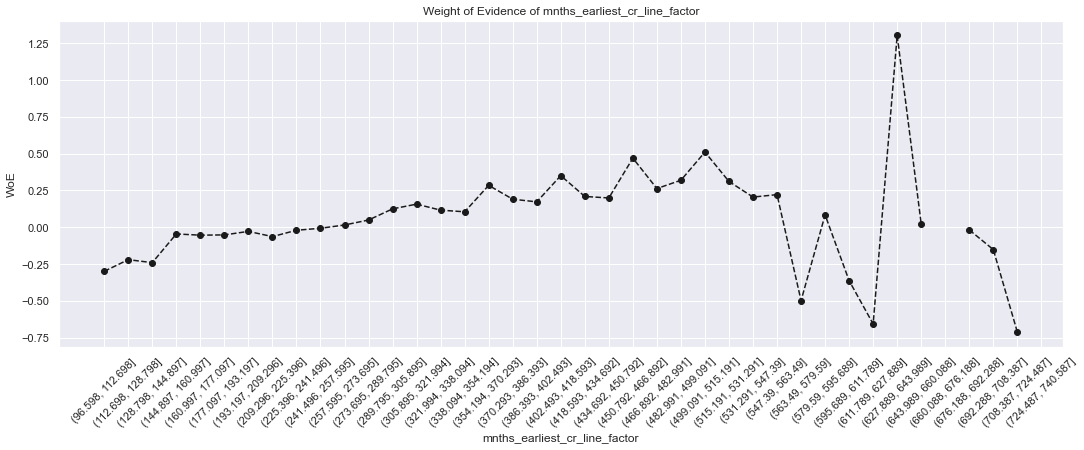

In [276]:
plot_woe(df_temp.iloc[6:,:],45)

In [277]:
df_input['mnths_earliest_cr_line:<140'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(140)), 1, 0)
df_input['mnths_earliest_cr_line:141-164'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_input['mnths_earliest_cr_line:165-247'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_input['mnths_earliest_cr_line:248-270'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_input['mnths_earliest_cr_line:271-352'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_input['mnths_earliest_cr_line:>352'] = np.where(df_input['mnths_earliest_cr_line'].isin(range(353, int(df_input['mnths_earliest_cr_line'].max()))), 1, 0)

In [278]:
df_input['delinq_2yrs'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  7., 16.,  8., 18., 10.,  9.,
       13., 11., 14., 12., 19., 15.])

In [279]:
df_temp = Woe_continous(df_input, 'delinq_2yrs', df_output)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,76566,0.890944,0.821021,68216.0,8350.0,0.821217,0.819431,0.002177,inf
1,1.0,11297,0.890413,0.121138,10059.0,1238.0,0.121095,0.121492,-0.003270,inf
2,2.0,3192,0.885025,0.034228,2825.0,367.0,0.034009,0.036016,-0.057339,inf
3,3.0,1134,0.893298,0.012160,1013.0,121.0,0.012195,0.011874,0.026640,inf
4,4.0,510,0.886275,0.005469,452.0,58.0,0.005441,0.005692,-0.045001,inf
5,5.0,270,0.911111,0.002895,246.0,24.0,0.002961,0.002355,0.229037,inf
6,6.0,128,0.859375,0.001373,110.0,18.0,0.001324,0.001766,-0.288132,inf
7,7.0,67,0.925373,0.000718,62.0,5.0,0.000746,0.000491,0.419456,inf
8,8.0,29,0.896552,0.000311,26.0,3.0,0.000313,0.000294,0.061244,inf
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000253,0.000098,0.946282,inf


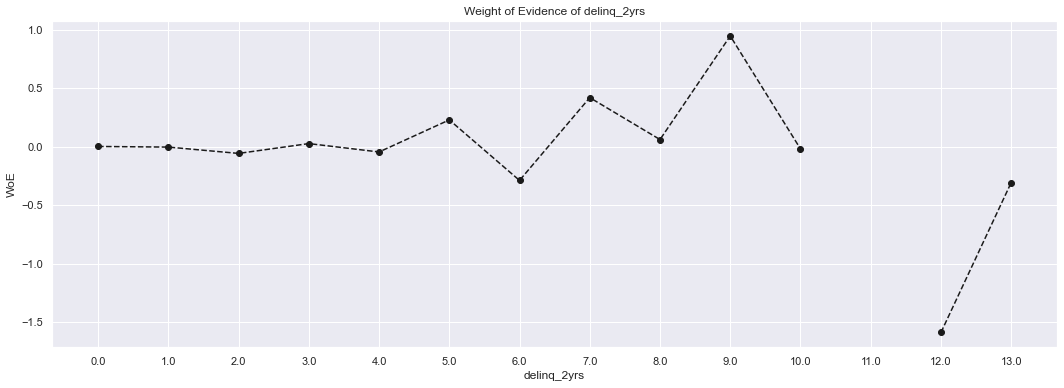

In [280]:
plot_woe(df_temp)

In [281]:
df_input['delinq_2yrs:0'] = np.where((df_input['delinq_2yrs']==0),1,0)
df_input['delinq_2yrs:1-3'] = np.where(((df_input['delinq_2yrs']>0) & (df_input['delinq_2yrs']<=3)),1,0)
df_input['delinq_2yrs:>=4'] = np.where((df_input['delinq_2yrs']>3),1,0)

In [282]:
df_input['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  5.,  4.,  6.,  3.,  7.,  8., 11.,  9., 18., 19.,
       24., 10., 12., 13., 14.])

In [283]:
df_temp = Woe_continous(df_input,'inq_last_6mths',df_output)
df_temp

D:\Users\imhj1\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,48295,0.910094,0.517870,43953.0,4342.0,0.529127,0.426104,0.216545,inf
1,1.0,25985,0.882394,0.278639,22929.0,3056.0,0.276030,0.299902,-0.082945,inf
2,2.0,11611,0.861252,0.124505,10000.0,1611.0,0.120385,0.158096,-0.272511,inf
3,3.0,5086,0.846245,0.054537,4304.0,782.0,0.051814,0.076742,-0.392795,inf
4,4.0,1431,0.841370,0.015345,1204.0,227.0,0.014494,0.022277,-0.429786,inf
5,5.0,551,0.842105,0.005908,464.0,87.0,0.005586,0.008538,-0.424264,inf
6,6.0,211,0.763033,0.002263,161.0,50.0,0.001938,0.004907,-0.928859,inf
7,7.0,36,0.527778,0.000386,19.0,17.0,0.000229,0.001668,-1.987015,inf
8,8.0,21,0.523810,0.000225,11.0,10.0,0.000132,0.000981,-2.002930,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000036,0.000393,-2.385923,inf


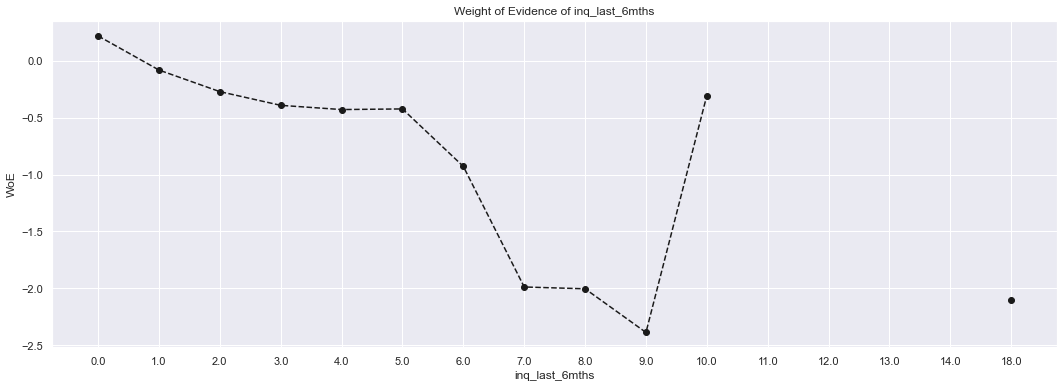

In [284]:
plot_woe(df_temp)

In [285]:
df_input['inq_last_6mths:0'] = np.where(df_input['inq_last_6mths']==0,1,0)
df_input['inq_last_6mths:1-2'] = np.where((df_input['inq_last_6mths']>0) & (df_input['inq_last_6mths']<=2),1,0)
df_input['inq_last_6mths:3-6'] = np.where((df_input['inq_last_6mths']>=3) & (df_input['inq_last_6mths']<=6),1,0)
df_input['inq_last_6mths:>6'] = np.where(df_input['inq_last_6mths']>6,1,0)

In [286]:
df_input['open_acc'].unique()

array([ 7., 18.,  9., 12.,  5., 22.,  3., 17., 16.,  6., 10., 20., 23.,
       13.,  4., 15., 14., 11., 19., 24., 21.,  8., 31., 26.,  1., 32.,
       37., 27., 25.,  2., 28., 29., 30., 39., 34., 33., 35., 36., 40.,
        0., 38., 53., 48., 52., 46., 42., 45., 43., 58., 41., 49., 61.,
       50.])

In [287]:
df_temp = Woe_continous(df_input,'open_acc',df_output)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,inf
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000337,0.000393,-0.152331,inf
2,2.0,334,0.838323,0.003582,280.0,54.0,0.003371,0.005299,-0.452435,inf
3,3.0,1122,0.852941,0.012031,957.0,165.0,0.011521,0.016192,-0.340383,inf
4,4.0,2560,0.892188,0.027451,2284.0,276.0,0.027496,0.027085,0.015042,inf
5,5.0,4403,0.891438,0.047214,3925.0,478.0,0.047251,0.046909,0.007270,inf
6,6.0,6216,0.890766,0.066655,5537.0,679.0,0.066657,0.066634,0.000346,inf
7,7.0,7433,0.886856,0.079704,6592.0,841.0,0.079358,0.082532,-0.039220,inf
8,8.0,8314,0.893433,0.089151,7428.0,886.0,0.089422,0.086948,0.028054,inf
9,9.0,8768,0.888230,0.094020,7788.0,980.0,0.093756,0.096173,-0.025454,inf


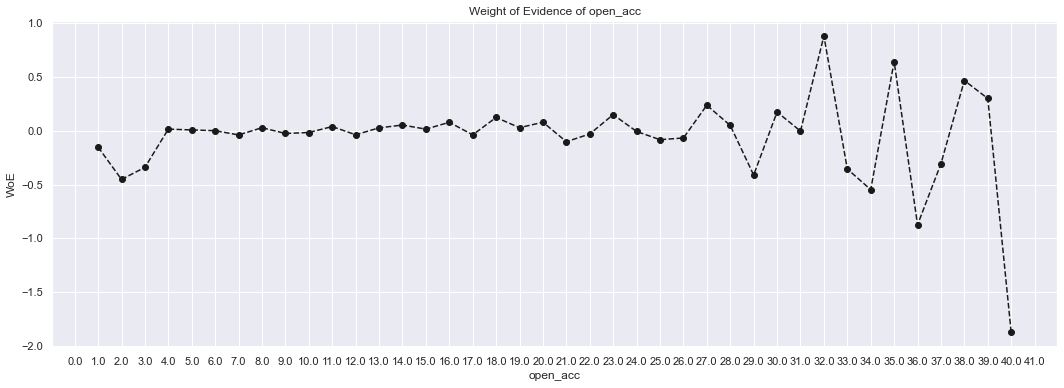

In [288]:
plot_woe(df_temp)

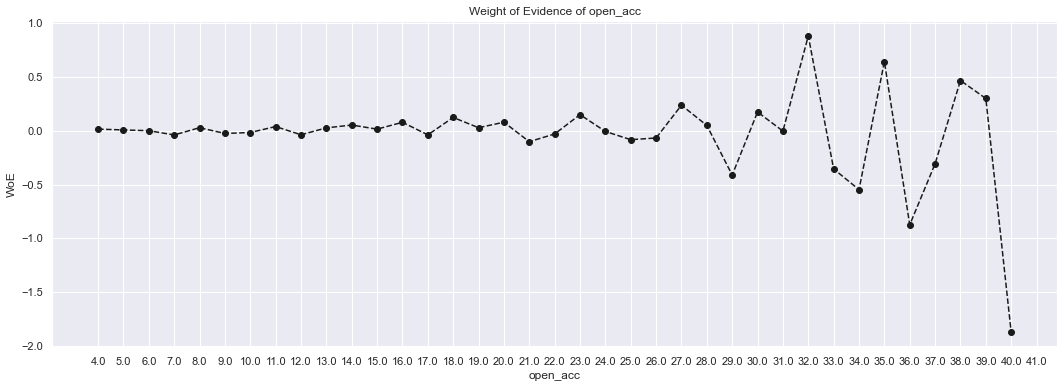

In [289]:
plot_woe(df_temp.iloc[4:,:])

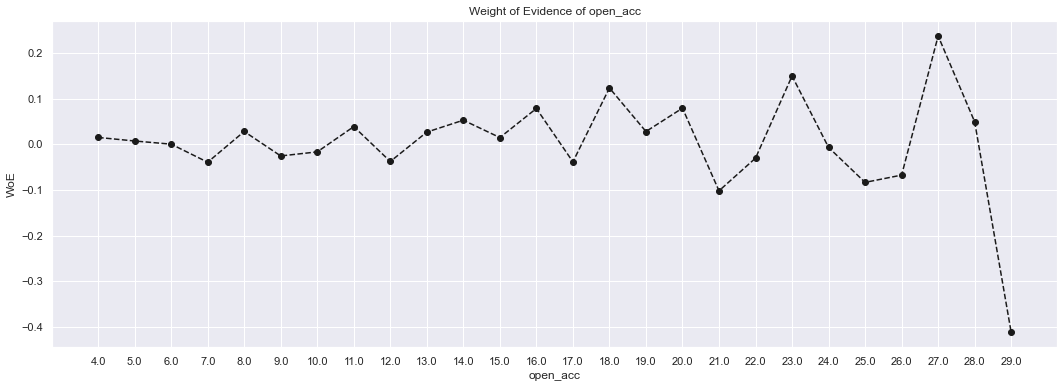

In [290]:
plot_woe(df_temp.iloc[4:30,:])

In [291]:
df_input['open_acc:0'] = np.where((df_input['open_acc'] == 0), 1, 0)
df_input['open_acc:1-3'] = np.where((df_input['open_acc'] >= 1) & (df_input['open_acc'] <= 3), 1, 0)
df_input['open_acc:4-12'] = np.where((df_input['open_acc'] >= 4) & (df_input['open_acc'] <= 12), 1, 0)
df_input['open_acc:13-17'] = np.where((df_input['open_acc'] >= 13) & (df_input['open_acc'] <= 17), 1, 0)
df_input['open_acc:18-22'] = np.where((df_input['open_acc'] >= 18) & (df_input['open_acc'] <= 22), 1, 0)
df_input['open_acc:23-25'] = np.where((df_input['open_acc'] >= 23) & (df_input['open_acc'] <= 25), 1, 0)
df_input['open_acc:26-30'] = np.where((df_input['open_acc'] >= 26) & (df_input['open_acc'] <= 30), 1, 0)
df_input['open_acc:>=31'] = np.where((df_input['open_acc'] >= 31), 1, 0)

In [292]:
df_input['pub_rec'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., 12., 49.,  7.,  6.,  8., 14., 11.,
       10.,  9.])

In [293]:
df_temp = Woe_continous(df_input,'pub_rec',df_output)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,80923,0.889179,0.867742,71955.0,8968.0,0.866228,0.880079,-0.015862,inf
1,1.0,10670,0.901125,0.114415,9615.0,1055.0,0.115750,0.103533,0.111543,inf
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011942,0.010304,0.147522,inf
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003587,0.003238,0.102345,inf
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001156,0.001570,-0.306481,inf
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000795,0.000687,0.145504,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000205,0.000196,0.041825,inf
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000294,-0.798958,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000098,-0.711946,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,inf


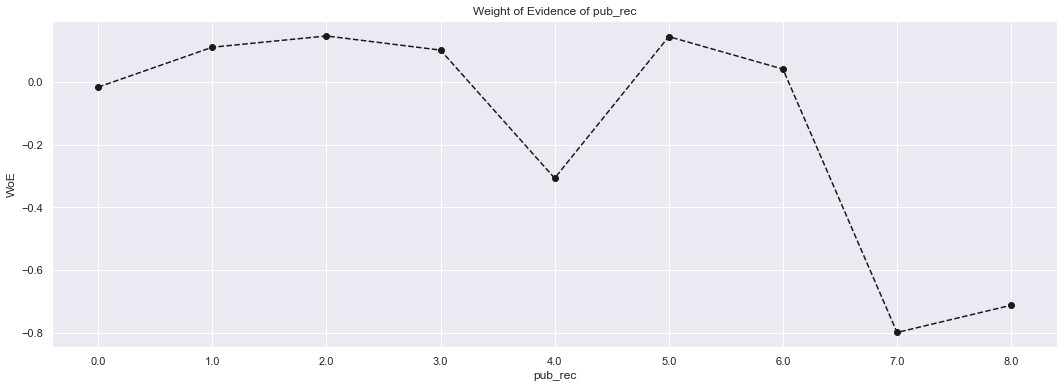

In [294]:
plot_woe(df_temp)

In [295]:
df_input['pub_rec:0-2'] = np.where((df_input['pub_rec']<=2),1,0)
df_input['pub_rec:3-4'] = np.where((df_input['pub_rec']>=3) & (df_input['pub_rec']<=4),1,0)
df_input['pub_rec:>=5'] = np.where(df_input['pub_rec']>=5,1,0)

In [296]:
df_input['total_acc'].unique()

array([ 20.,  43.,  38.,  31.,  36.,  48.,  10.,  45.,   5.,  32.,  26.,
        41.,  40.,  47.,   8.,  14.,  42.,  24.,   6.,  23.,  17.,  11.,
        25.,  21.,  28.,  29.,  12.,  37.,  19.,  35.,  34.,  30.,  18.,
        13.,   9.,  44.,  50.,  22.,  33.,  59.,  16.,  15.,  27.,  39.,
        46.,  63.,   7.,  52.,  56.,  54.,  49.,   4.,  57.,  60.,  53.,
        67.,  51.,  55.,  65.,  61., 156.,   3.,  66.,  58.,  80.,  64.,
        62.,  73.,  71.,  72.,  91.,  79.,  69.,   2.,  78.,   0.,  81.,
        92.,  74.,  70.,  77.,  75.,  68.,  76.,  85.,  88.,  94.,  97.,
         1.,  99.,  86.,  89.,  84.,  83.,  82.,  93.])

In [297]:
df_input['total_acc_factor'] = pd.cut(df_input['total_acc'],50)
df_temp = Woe_continous(df_input,'total_acc_factor',df_output)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.156, 3.12]",125,0.776000,0.001340,97.0,28.0,0.001168,0.002748,-0.855734,inf
1,"(3.12, 6.24]",1499,0.850567,0.016074,1275.0,224.0,0.015349,0.021982,-0.359185,inf
2,"(6.24, 9.36]",3715,0.871871,0.039836,3239.0,476.0,0.038993,0.046712,-0.180639,inf
3,"(9.36, 12.48]",6288,0.874841,0.067427,5501.0,787.0,0.066224,0.077233,-0.153784,inf
4,"(12.48, 15.6]",8289,0.888286,0.088883,7363.0,926.0,0.088639,0.090873,-0.024892,inf
5,"(15.6, 18.72]",9843,0.890176,0.105547,8762.0,1081.0,0.105481,0.106084,-0.005703,inf
6,"(18.72, 21.84]",10270,0.893866,0.110126,9180.0,1090.0,0.110513,0.106968,0.032609,inf
7,"(21.84, 24.96]",9971,0.892789,0.106920,8902.0,1069.0,0.107167,0.104907,0.021312,inf
8,"(24.96, 28.08]",11873,0.892108,0.127315,10592.0,1281.0,0.127512,0.125711,0.014217,inf
9,"(28.08, 31.2]",7289,0.892715,0.078160,6507.0,782.0,0.078334,0.076742,0.020538,inf


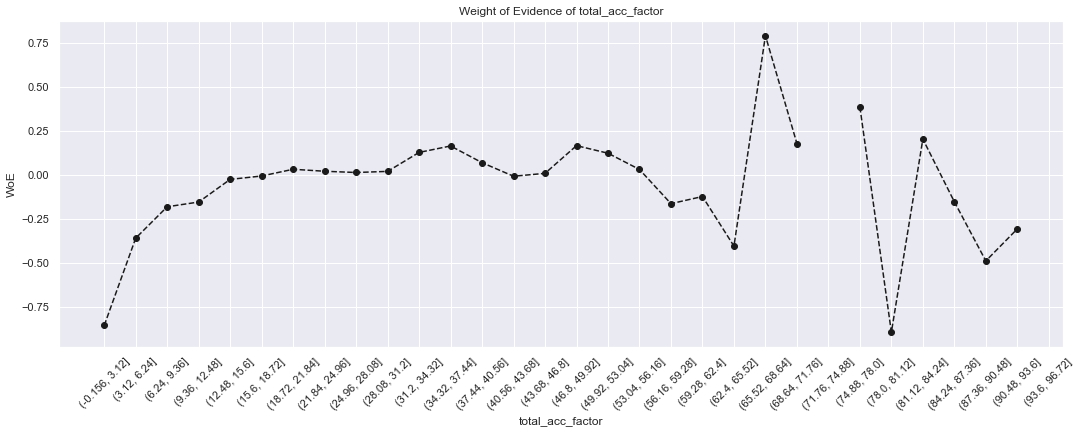

In [298]:
plot_woe(df_temp,45)

In [299]:
df_input['total_acc:<=27'] = np.where(df_input['total_acc']<=27,1,0)
df_input['total_acc:28-51'] = np.where((df_input['total_acc']>=28) & (df_input['total_acc']<=51),1,0)
df_input['total_acc:>=52'] = np.where(df_input['total_acc']>=52,1,0)

In [300]:
df_input['acc_now_delinq'].unique()

array([0., 1., 2., 3.])

In [301]:
df_temp = Woe_continous(df_input,'acc_now_delinq',df_output)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,0.0,92871,0.890827,0.995861,82732.0,10139.0,0.995967,0.994995,0.000976,0.000298
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003780,0.004514,-0.177489,0.000298
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000217,0.000393,-0.594163,0.000298
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000098,-0.999628,0.000298


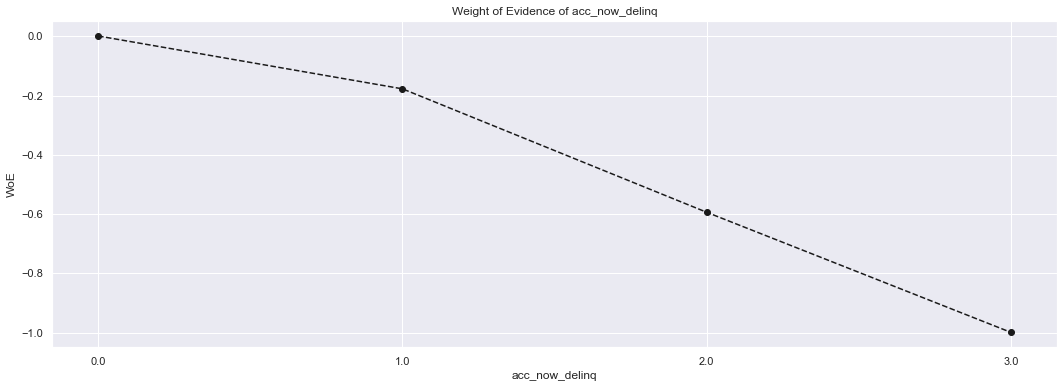

In [302]:
plot_woe(df_temp)

In [303]:
df_input['acc_now_delinq:0'] = np.where(df_input['acc_now_delinq']==0,1,0)
df_input['acc_now_delinq:>=1'] = np.where(df_input['acc_now_delinq']>=1,1,0)

In [304]:
df_input['total_rev_hi_lim'].unique()

array([25100., 24000., 30000., ..., 61299., 21188., 13962.])

In [305]:
df_input['total_rev_hi_lim'].describe()

count    9.325700e+04
mean     2.758552e+04
std      2.939144e+04
min      0.000000e+00
25%      1.150000e+04
50%      2.010000e+04
75%      3.450000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

In [306]:
df_input['total_rev_hi_lim_factor'] = pd.cut(df_input['total_rev_hi_lim'],2000)

In [307]:
df_temp = Woe_continous(df_input,'total_rev_hi_lim_factor',df_output)
df_temp

D:\Users\imhj1\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-2013.133, 1006.566]",238,0.840336,0.002552,200.0,38.0,0.002408,0.003729,-0.437509,inf
1,"(1006.566, 2013.133]",678,0.827434,0.007270,561.0,117.0,0.006754,0.011482,-0.530694,inf
2,"(2013.133, 3019.7]",1121,0.852810,0.012021,956.0,165.0,0.011509,0.016192,-0.341428,inf
3,"(3019.7, 4026.266]",1461,0.878166,0.015666,1283.0,178.0,0.015445,0.017468,-0.123068,inf
4,"(4026.266, 5032.832]",2163,0.867776,0.023194,1877.0,286.0,0.022596,0.028067,-0.216802,inf
...,...,...,...,...,...,...,...,...,...,...
1995,"(2008100.168, 2009106.734]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
1996,"(2009106.734, 2010113.301]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
1997,"(2010113.301, 2011119.867]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
1998,"(2011119.867, 2012126.434]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf


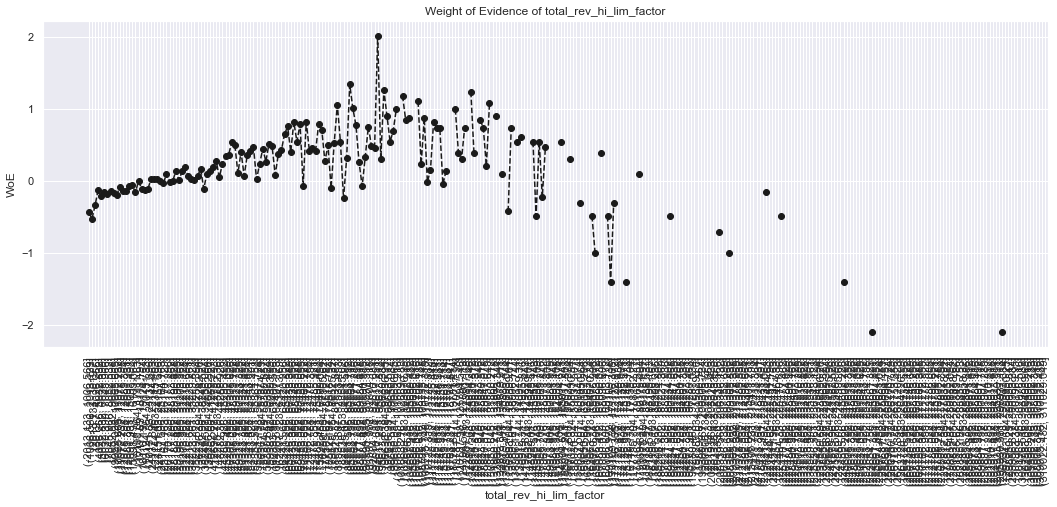

In [308]:
plot_woe(df_temp,90)

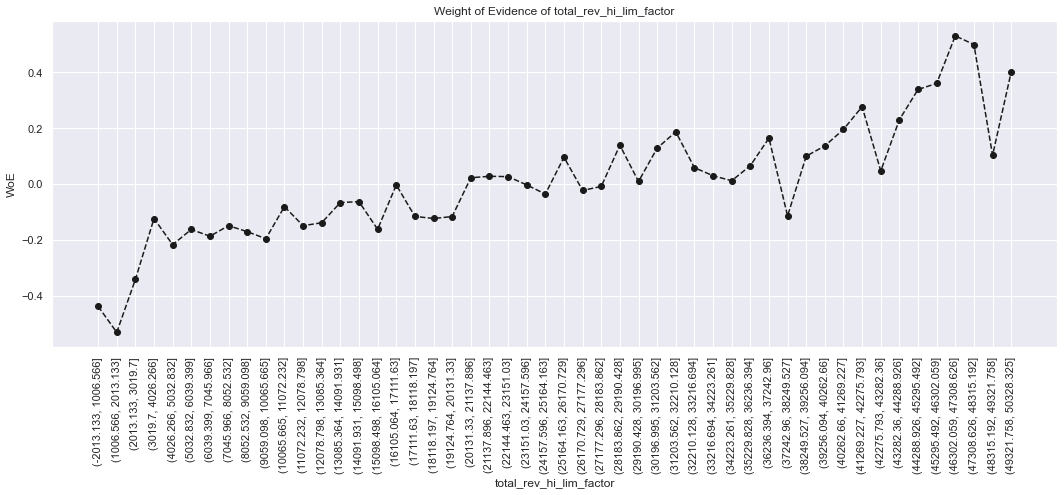

In [309]:
plot_woe(df_temp.iloc[:50,:],90)

In [310]:
df_input['total_rev_hi_lim:<=5K'] = np.where((df_input['total_rev_hi_lim'] <= 5000), 1, 0)
df_input['total_rev_hi_lim:5K-10K'] = np.where((df_input['total_rev_hi_lim'] > 5000) & (df_input['total_rev_hi_lim'] <= 10000), 1, 0)
df_input['total_rev_hi_lim:10K-20K'] = np.where((df_input['total_rev_hi_lim'] > 10000) & (df_input['total_rev_hi_lim'] <= 20000), 1, 0)
df_input['total_rev_hi_lim:20K-30K'] = np.where((df_input['total_rev_hi_lim'] > 20000) & (df_input['total_rev_hi_lim'] <= 30000), 1, 0)
df_input['total_rev_hi_lim:30K-40K'] = np.where((df_input['total_rev_hi_lim'] > 30000) & (df_input['total_rev_hi_lim'] <= 40000), 1, 0)
df_input['total_rev_hi_lim:40K-55K'] = np.where((df_input['total_rev_hi_lim'] > 40000) & (df_input['total_rev_hi_lim'] <= 55000), 1, 0)
df_input['total_rev_hi_lim:55K-95K'] = np.where((df_input['total_rev_hi_lim'] > 55000) & (df_input['total_rev_hi_lim'] <= 95000), 1, 0)
df_input['total_rev_hi_lim:>95K'] = np.where((df_input['total_rev_hi_lim'] > 95000), 1, 0)

In [311]:
df_input['installment'].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [312]:
df_input['installment_factor'] = pd.cut(df_input['installment'],50)
df_temp = Woe_continous(df_input,'installment_factor',df_output)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(14.369, 43.585]",485,0.872165,0.005201,423.0,62.0,0.005092,0.006084,-0.178003,inf
1,"(43.585, 71.41]",1246,0.904494,0.013361,1127.0,119.0,0.013567,0.011678,0.149950,inf
2,"(71.41, 99.235]",1731,0.895436,0.018562,1550.0,181.0,0.018660,0.017763,0.049273,inf
3,"(99.235, 127.06]",2292,0.896597,0.024577,2055.0,237.0,0.024739,0.023258,0.061730,inf
4,"(127.06, 154.885]",2602,0.886241,0.027901,2306.0,296.0,0.027761,0.029048,-0.045330,inf
5,"(154.885, 182.71]",4133,0.897653,0.044318,3710.0,423.0,0.044663,0.041511,0.073174,inf
6,"(182.71, 210.535]",4109,0.905086,0.044061,3719.0,390.0,0.044771,0.038273,0.156823,inf
7,"(210.535, 238.36]",3730,0.901877,0.039997,3364.0,366.0,0.040497,0.035918,0.120012,inf
8,"(238.36, 266.185]",4660,0.899785,0.049969,4193.0,467.0,0.050477,0.045829,0.096602,inf
9,"(266.185, 294.01]",4975,0.888844,0.053347,4422.0,553.0,0.053234,0.054269,-0.019251,inf


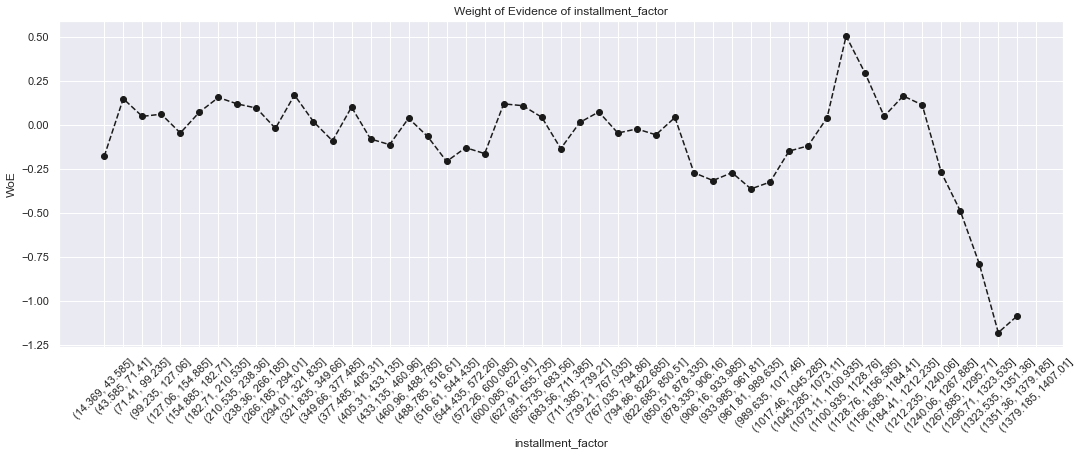

In [313]:
plot_woe(df_temp,45)
#we can ignore this feature due to its low information value

In [314]:
df_input['annual_inc'].unique()

array([ 65000.,  60000., 175000., ...,  81961.,  29310.,  47939.])

In [315]:
df_input['annual_inc'].describe()

count    9.325700e+04
mean     7.349199e+04
std      5.978793e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.900000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [316]:
df_input['annual_inc_factor'] = pd.cut(df_input['annual_inc'],50)
df_temp = Woe_continous(df_input,'annual_inc_factor',df_output)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-2695.2, 154704.0]",89203,0.889040,0.956529,79305.0,9898.0,0.954711,0.971344,-0.017272,inf
1,"(154704.0, 304608.0]",3626,0.926641,0.038882,3360.0,266.0,0.040449,0.026104,0.437959,inf
2,"(304608.0, 454512.0]",282,0.929078,0.003024,262.0,20.0,0.003154,0.001963,0.474372,inf
3,"(454512.0, 604416.0]",86,0.965116,0.000922,83.0,3.0,0.000999,0.000294,1.221988,inf
4,"(604416.0, 754320.0]",23,0.956522,0.000247,22.0,1.0,0.000265,0.000098,0.992802,inf
5,"(754320.0, 904224.0]",18,0.944444,0.000193,17.0,1.0,0.000205,0.000098,0.734973,inf
6,"(904224.0, 1054128.0]",7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,inf
7,"(1054128.0, 1204032.0]",6,1.000000,0.000064,6.0,0.0,0.000072,0.000000,inf,inf
8,"(1204032.0, 1353936.0]",2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,inf
9,"(1353936.0, 1503840.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,inf


In [317]:
df_input['annual_inc_factor'] = pd.cut(df_input['annual_inc'],100)
df_temp = Woe_continous(df_input,'annual_inc_factor',df_output)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,inf


In [318]:
df_input_temp = df_input.loc[df_input['annual_inc']<140000,:]

In [319]:
df_input_temp['annual_inc_factor'] = pd.cut(df_input_temp['annual_inc'],50)
df_temp = Woe_continous(df_input_temp,'annual_inc_factor',df_output[df_input_temp.index])
df_temp

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\3698277171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_temp['annual_inc_factor'] = pd.cut(df_input_temp['annual_inc'],50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(4664.808, 7503.84]",10,1.000000,0.000115,10.0,0.0,0.000129,0.000000,inf,inf
1,"(7503.84, 10207.68]",84,0.761905,0.000963,64.0,20.0,0.000826,0.002053,-0.909701,inf
2,"(10207.68, 12911.52]",123,0.780488,0.001411,96.0,27.0,0.001240,0.002771,-0.804340,inf
3,"(12911.52, 15615.36]",304,0.851974,0.003487,259.0,45.0,0.003345,0.004618,-0.322686,inf
4,"(15615.36, 18319.2]",383,0.827676,0.004393,317.0,66.0,0.004093,0.006773,-0.503605,inf
5,"(18319.2, 21023.04]",733,0.840382,0.008408,616.0,117.0,0.007955,0.012007,-0.411779,inf
6,"(21023.04, 23726.88]",704,0.846591,0.008075,596.0,108.0,0.007696,0.011084,-0.364742,inf
7,"(23726.88, 26430.72]",1785,0.861064,0.020474,1537.0,248.0,0.019848,0.025452,-0.248693,inf
8,"(26430.72, 29134.56]",1355,0.853137,0.015542,1156.0,199.0,0.014928,0.020423,-0.313436,inf
9,"(29134.56, 31838.4]",2292,0.854276,0.026289,1958.0,334.0,0.025284,0.034278,-0.304314,inf


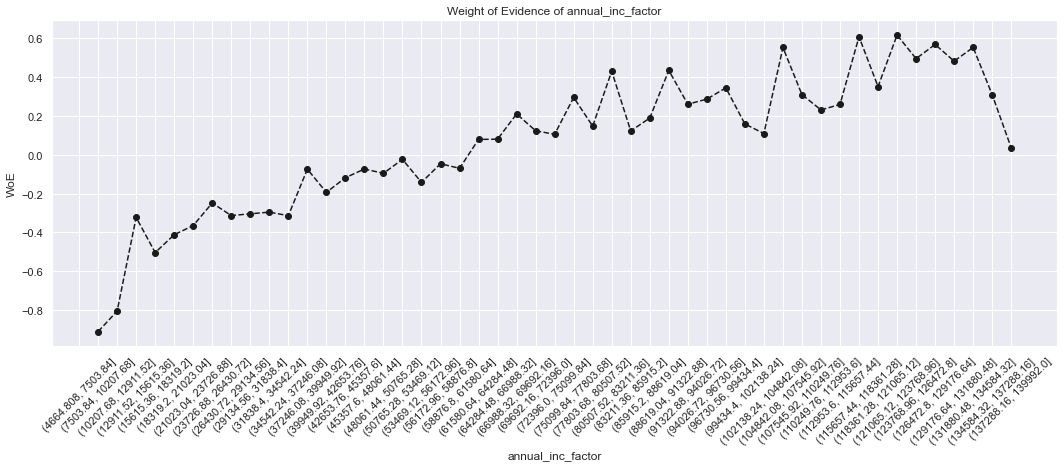

In [320]:
plot_woe(df_temp,45)

In [321]:
df_input['annual_inc:<20K'] = np.where((df_input['annual_inc'] <= 20000), 1, 0)
df_input['annual_inc:20K-30K'] = np.where((df_input['annual_inc'] > 20000) & (df_input['annual_inc'] <= 30000), 1, 0)
df_input['annual_inc:30K-40K'] = np.where((df_input['annual_inc'] > 30000) & (df_input['annual_inc'] <= 40000), 1, 0)
df_input['annual_inc:40K-50K'] = np.where((df_input['annual_inc'] > 40000) & (df_input['annual_inc'] <= 50000), 1, 0)
df_input['annual_inc:50K-60K'] = np.where((df_input['annual_inc'] > 50000) & (df_input['annual_inc'] <= 60000), 1, 0)
df_input['annual_inc:60K-70K'] = np.where((df_input['annual_inc'] > 60000) & (df_input['annual_inc'] <= 70000), 1, 0)
df_input['annual_inc:70K-80K'] = np.where((df_input['annual_inc'] > 70000) & (df_input['annual_inc'] <= 80000), 1, 0)
df_input['annual_inc:80K-90K'] = np.where((df_input['annual_inc'] > 80000) & (df_input['annual_inc'] <= 90000), 1, 0)
df_input['annual_inc:90K-100K'] = np.where((df_input['annual_inc'] > 90000) & (df_input['annual_inc'] <= 100000), 1, 0)
df_input['annual_inc:100K-120K'] = np.where((df_input['annual_inc'] > 100000) & (df_input['annual_inc'] <= 120000), 1, 0)
df_input['annual_inc:120K-140K'] = np.where((df_input['annual_inc'] > 120000) & (df_input['annual_inc'] <= 140000), 1, 0)
df_input['annual_inc:>140K'] = np.where((df_input['annual_inc'] > 140000), 1, 0)

In [322]:
df_input['mths_since_last_delinq'].unique()

array([ nan,   3.,  41.,  39.,  12.,  73.,  26.,  40.,  68.,  63.,   0.,
        46.,  58.,  72.,  75.,  20.,  52.,  38.,  33.,  44.,  22.,   2.,
        16.,  47.,  42.,  76.,  37.,  30.,  13.,  35.,  71.,  43.,  61.,
        15.,   7.,  25.,   9.,  21.,  28.,  59.,  14.,  31.,  34.,  18.,
        51.,  77.,  79.,  45.,  32.,   8.,  24.,   1.,  54.,  60.,  49.,
        11.,  53.,  29.,  69.,  62.,  78.,  19.,  23.,  36.,  81.,   5.,
        27.,  17.,  55.,   6.,  64.,  56.,  70.,  48.,   4.,  57.,  50.,
        10.,  80.,  67.,  83.,  65.,  74.,  82.,  66.,  88.,  84., 143.,
       107.,  85., 122.,  90.,  95.,  86., 170.,  87., 131., 101., 103.,
        99.,  97., 118., 110., 119., 135.,  96., 121., 106., 124., 105.,
       113.])

In [323]:
df_input_temp = df_input[pd.notnull(df_input['mths_since_last_delinq'])]
df_input_temp['mths_since_last_delinq_factor'] = pd.cut(df_input_temp['mths_since_last_delinq'],50)

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\2015332724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_temp['mths_since_last_delinq_factor'] = pd.cut(df_input_temp['mths_since_last_delinq'],50)


In [324]:
df_temp = Woe_continous(df_input_temp,'mths_since_last_delinq_factor',df_output[df_input_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,inf


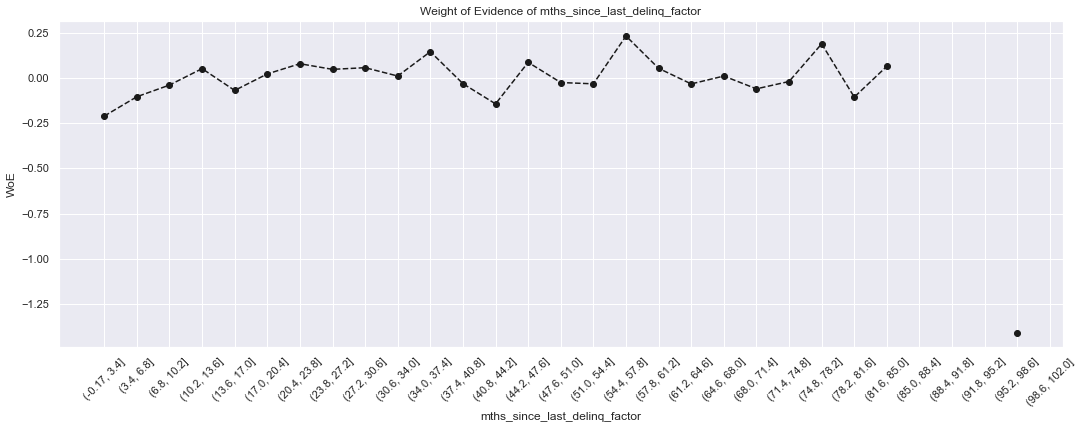

In [325]:
plot_woe(df_temp,45)

In [326]:
df_input['mths_since_last_delinq:Missing'] = np.where((df_input['mths_since_last_delinq'].isnull()), 1, 0)
df_input['mths_since_last_delinq:0-3'] = np.where((df_input['mths_since_last_delinq'] >= 0) & (df_input['mths_since_last_delinq'] <= 3), 1, 0)
df_input['mths_since_last_delinq:4-30'] = np.where((df_input['mths_since_last_delinq'] >= 4) & (df_input['mths_since_last_delinq'] <= 30), 1, 0)
df_input['mths_since_last_delinq:31-56'] = np.where((df_input['mths_since_last_delinq'] >= 31) & (df_input['mths_since_last_delinq'] <= 56), 1, 0)
df_input['mths_since_last_delinq:>=57'] = np.where((df_input['mths_since_last_delinq'] >= 57), 1, 0)

In [327]:
df_input['dti'].unique()

array([ 9.32, 24.19, 13.34, ..., 37.86, 36.4 , 36.91])

In [328]:
df_input['dti_factor'] = pd.cut(df_input['dti'],100)
df_temp = Woe_continous(df_input,'dti_factor',df_output)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.04, 0.4]",187,0.893048,0.002005,167.0,20.0,0.002010,0.001963,0.024021,0.038146
1,"(0.4, 0.8]",184,0.880435,0.001973,162.0,22.0,0.001950,0.002159,-0.101687,0.038146
2,"(0.8, 1.2]",223,0.892377,0.002391,199.0,24.0,0.002396,0.002355,0.017010,0.038146
3,"(1.2, 1.6]",255,0.905882,0.002734,231.0,24.0,0.002781,0.002355,0.166123,0.038146
4,"(1.6, 2.0]",315,0.892063,0.003378,281.0,34.0,0.003383,0.003337,0.013753,0.038146
5,"(2.0, 2.399]",324,0.913580,0.003474,296.0,28.0,0.003563,0.002748,0.259914,0.038146
6,"(2.399, 2.799]",366,0.918033,0.003925,336.0,30.0,0.004045,0.002944,0.317673,0.038146
7,"(2.799, 3.199]",442,0.907240,0.004740,401.0,41.0,0.004827,0.004024,0.182149,0.038146
8,"(3.199, 3.599]",484,0.933884,0.005190,452.0,32.0,0.005441,0.003140,0.549706,0.038146
9,"(3.599, 3.999]",563,0.902309,0.006037,508.0,55.0,0.006116,0.005397,0.124908,0.038146


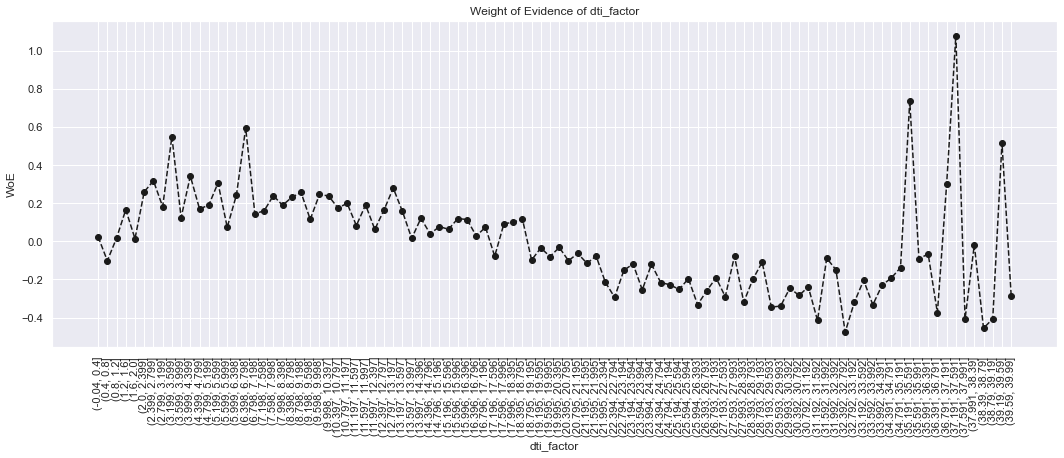

In [329]:
plot_woe(df_temp,90)

In [330]:
df_input_temp = df_input.loc[df_input['dti']<=35,:]

In [331]:
df_input_temp['dti_factor'] = pd.cut(df_input_temp['dti'],50)
df_temp = Woe_continous(df_input_temp,'dti_factor',df_output[df_input_temp.index])
df_temp

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\3603380319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_temp['dti_factor'] = pd.cut(df_input_temp['dti'],50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.035, 0.7]",328,0.884146,0.003544,290.0,38.0,0.003518,0.003758,-0.066005,0.033919
1,"(0.7, 1.4]",393,0.903308,0.004246,355.0,38.0,0.004306,0.003758,0.136232,0.033919
2,"(1.4, 2.1]",536,0.895522,0.005792,480.0,56.0,0.005823,0.005538,0.050135,0.033919
3,"(2.1, 2.8]",607,0.915980,0.006559,556.0,51.0,0.006745,0.005044,0.290643,0.033919
4,"(2.8, 3.5]",811,0.924784,0.008763,750.0,61.0,0.009098,0.006032,0.410900,0.033919
5,"(3.5, 4.2]",970,0.903093,0.010481,876.0,94.0,0.010626,0.009296,0.133772,0.033919
6,"(4.2, 4.9]",1140,0.913158,0.012318,1041.0,99.0,0.012628,0.009790,0.254518,0.033919
7,"(4.9, 5.6]",1370,0.911679,0.014803,1249.0,121.0,0.015151,0.011966,0.236009,0.033919
8,"(5.6, 6.3]",1491,0.904762,0.016111,1349.0,142.0,0.016364,0.014043,0.152992,0.033919
9,"(6.3, 7.0]",1722,0.926829,0.018607,1596.0,126.0,0.019360,0.012460,0.440674,0.033919


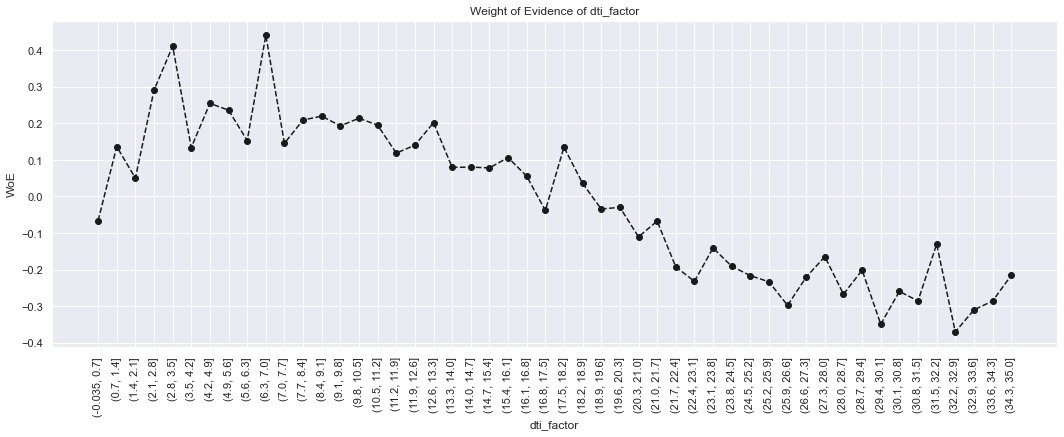

In [332]:
plot_woe(df_temp,90)

In [333]:
df_input['dti:<=1.4'] = np.where((df_input['dti'] <= 1.4), 1, 0)
df_input['dti:1.4-3.5'] = np.where((df_input['dti'] > 1.4) & (df_input['dti'] <= 3.5), 1, 0)
df_input['dti:3.5-7.7'] = np.where((df_input['dti'] > 3.5) & (df_input['dti'] <= 7.7), 1, 0)
df_input['dti:7.7-10.5'] = np.where((df_input['dti'] > 7.7) & (df_input['dti'] <= 10.5), 1, 0)
df_input['dti:10.5-16.1'] = np.where((df_input['dti'] > 10.5) & (df_input['dti'] <= 16.1), 1, 0)
df_input['dti:16.1-20.3'] = np.where((df_input['dti'] > 16.1) & (df_input['dti'] <= 20.3), 1, 0)
df_input['dti:20.3-21.7'] = np.where((df_input['dti'] > 20.3) & (df_input['dti'] <= 21.7), 1, 0)
df_input['dti:21.7-22.4'] = np.where((df_input['dti'] > 21.7) & (df_input['dti'] <= 22.4), 1, 0)
df_input['dti:22.4-35'] = np.where((df_input['dti'] > 22.4) & (df_input['dti'] <= 35), 1, 0)
df_input['dti:>35'] = np.where((df_input['dti'] > 35), 1, 0)

In [334]:
df_input['mths_since_last_record'].unique()

array([ nan, 106., 110., 115.,   0.,  70.,  75.,  64.,  58., 105.,  85.,
       108.,  20.,  71.,  41.,  66.,  80.,  97.,  33.,  59.,  27., 113.,
        95.,  94.,  40.,  74., 117.,  99.,  23.,  81.,  51.,  67.,  82.,
       107.,  68.,  55., 103., 116.,  46.,  77.,  56.,  45.,   7., 109.,
        57.,  61.,  60.,  88.,  39.,  69., 100.,  24.,  54.,  86.,  42.,
        53., 114.,  48., 111.,  50., 104.,  76., 118.,   1.,  65.,  98.,
         8.,  44., 112.,  29.,  43.,  72.,  90.,  49.,  78.,  63.,  25.,
        73.,  30.,  52.,  89.,  37., 102.,  31.,  28., 119.,  87.,  34.,
        79.,  17.,  18.,  83.,  38., 101.,  14.,  84.,  32.,  91.,  93.,
        62.,  47.,  36.,  21.,  22.,  35.,  96.,  13.,  26.,   5.,  92.,
         9.,  11.,   4.,  15.,  16.,  12.,  10.,  19.,   3.,   6., 129.,
       120.,   2.])

In [335]:
df_input_temp = df_input[pd.notnull(df_input['mths_since_last_record'])]
df_input_temp['mths_since_last_record_factor'] = pd.cut(df_input_temp['mths_since_last_record'],50)
df_temp = Woe_continous(df_input_temp,'mths_since_last_record_factor',df_output[df_input_temp.index])
df_temp

C:\Users\imhj1\AppData\Local\Temp\ipykernel_8948\563887841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_temp['mths_since_last_record_factor'] = pd.cut(df_input_temp['mths_since_last_record'],50)
D:\Users\imhj1\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(-0.129, 2.58]",244,0.741803,0.019410,181.0,63.0,0.016036,0.049065,-1.118309,inf
1,"(2.58, 5.16]",36,0.888889,0.002864,32.0,4.0,0.002835,0.003115,-0.094230,inf
2,"(5.16, 7.74]",39,0.923077,0.003102,36.0,3.0,0.003190,0.002336,0.311235,inf
3,"(7.74, 10.32]",66,0.939394,0.005250,62.0,4.0,0.005493,0.003115,0.567169,inf
4,"(10.32, 12.9]",42,0.833333,0.003341,35.0,7.0,0.003101,0.005452,-0.564234,inf
5,"(12.9, 15.48]",69,0.869565,0.005489,60.0,9.0,0.005316,0.007009,-0.276551,inf
6,"(15.48, 18.06]",95,0.863158,0.007557,82.0,13.0,0.007265,0.010125,-0.331902,inf
7,"(18.06, 20.64]",58,0.965517,0.004614,56.0,2.0,0.004961,0.001558,1.158533,inf
8,"(20.64, 23.22]",101,0.891089,0.008034,90.0,11.0,0.007974,0.008567,-0.071757,inf
9,"(23.22, 25.8]",94,0.946809,0.007478,89.0,5.0,0.007885,0.003894,0.705527,inf


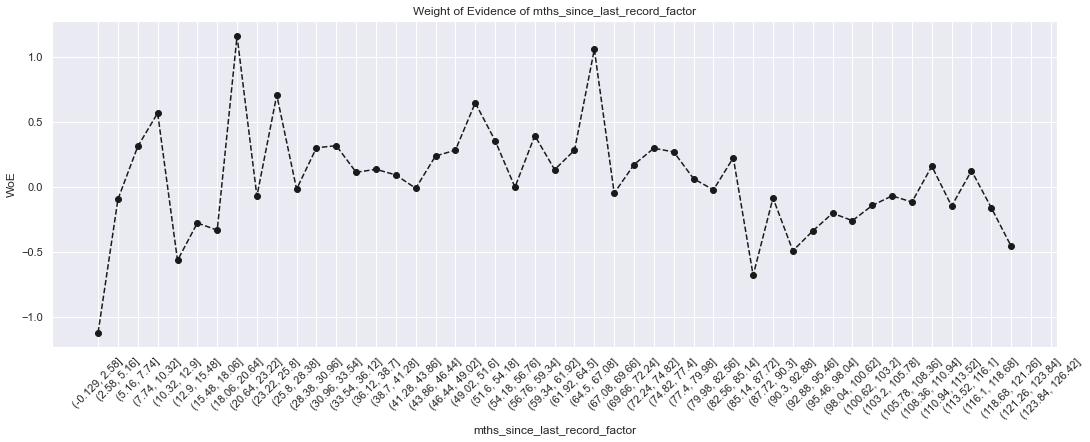

In [336]:
plot_woe(df_temp,45)

In [337]:
df_input['mths_since_last_record:Missing'] = np.where((df_input['mths_since_last_record'].isnull()), 1, 0)
df_input['mths_since_last_record:0-2'] = np.where((df_input['mths_since_last_record'] >= 0) & (df_input['mths_since_last_record'] <= 2), 1, 0)
df_input['mths_since_last_record:3-20'] = np.where((df_input['mths_since_last_record'] >= 3) & (df_input['mths_since_last_record'] <= 20), 1, 0)
df_input['mths_since_last_record:21-31'] = np.where((df_input['mths_since_last_record'] >= 21) & (df_input['mths_since_last_record'] <= 31), 1, 0)
df_input['mths_since_last_record:32-80'] = np.where((df_input['mths_since_last_record'] >= 32) & (df_input['mths_since_last_record'] <= 80), 1, 0)
df_input['mths_since_last_record:81-86'] = np.where((df_input['mths_since_last_record'] >= 81) & (df_input['mths_since_last_record'] <= 86), 1, 0)
df_input['mths_since_last_record:>=86'] = np.where((df_input['mths_since_last_record'] >= 86), 1, 0)

In [338]:
df_input['loan_amnt'].unique()

array([32500, 11000, 30000, ..., 30600, 32850, 29875], dtype=int64)

In [339]:
df_input['loan_amnt_factor'] = pd.cut(df_input['loan_amnt'],50)
df_temp = Woe_continous(df_input,'loan_amnt_factor',df_output)
df_temp

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,perc_good,perc_bad,WoE,Inf_Value
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,0.018902
1,"(1190.0, 1880.0]",795,0.895597,0.008525,712.0,83.0,0.008571,0.008145,0.050997,0.018902
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.018902
3,"(2570.0, 3260.0]",1818,0.893839,0.019495,1625.0,193.0,0.019563,0.018940,0.032332,0.018902
4,"(3260.0, 3950.0]",1237,0.892482,0.013264,1104.0,133.0,0.013290,0.013052,0.018105,0.018902
5,"(3950.0, 4640.0]",2290,0.882533,0.024556,2021.0,269.0,0.024330,0.026398,-0.081604,0.018902
6,"(4640.0, 5330.0]",3944,0.899087,0.042292,3546.0,398.0,0.042688,0.039058,0.088883,0.018902
7,"(5330.0, 6020.0]",4182,0.906743,0.044844,3792.0,390.0,0.045650,0.038273,0.176261,0.018902
8,"(6020.0, 6710.0]",1705,0.882698,0.018283,1505.0,200.0,0.018118,0.019627,-0.080010,0.018902
9,"(6710.0, 7400.0]",2871,0.893069,0.030786,2564.0,307.0,0.030867,0.030128,0.024235,0.018902


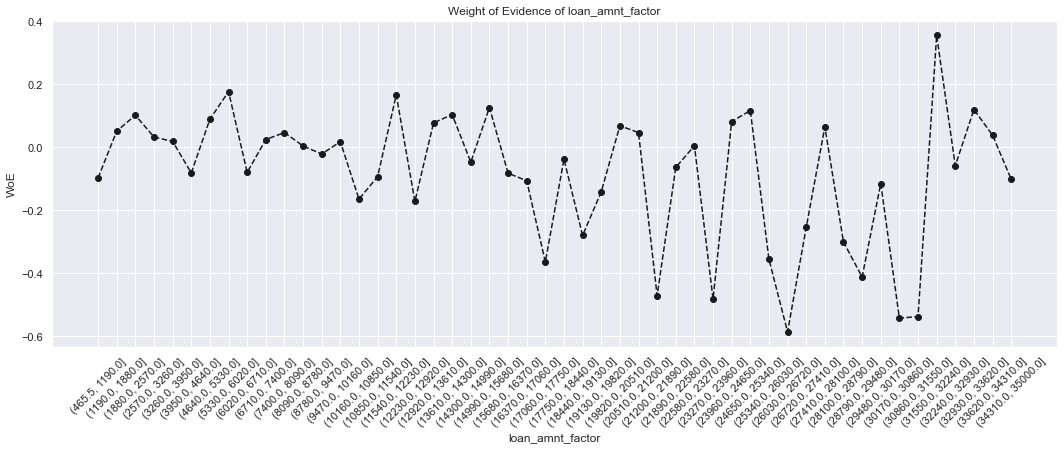

In [340]:
plot_woe(df_temp,45)

### Preprocessing the Test Dataset

In [341]:
# loan_data_input_train = df_input

In [342]:
loan_data_input_test = df_input

In [343]:
catogery_cols = [col for col in df_input.columns if df_input[col].dtype == 'category']

In [344]:
loan_data_input_train_final = loan_data_input_train.drop(catogery_cols,axis=1)
loan_data_input_test_final = loan_data_input_test.drop(catogery_cols,axis=1)

In [345]:
loan_data_input_train_final.to_csv('loan_data_input_train.csv')
loan_data_output_train.to_csv('loan_data_output_train.csv')
loan_data_input_test_final.to_csv('loan_data_input_test.csv')
loan_data_output_test.to_csv('loan_data_output_test.csv')